In [4]:
import argparse
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import torch

def load_events(log_dir, tag):
    """
    Load scalar events for a given tag from the TensorBoard log directory.
    """
    # Increase the size guidance if needed (default 1000 events may be too few)
    event_acc = EventAccumulator(log_dir, size_guidance={'scalars': 10000})
    event_acc.Reload()
    return event_acc.Scalars(tag)

def plot_loss(log_dir):
    # Load train and validation loss events
    train_events = load_events(log_dir, 'Loss/train')
    val_events = load_events(log_dir, 'Loss/validation')
    
    # Extract steps and loss values
    train_steps = [event.step for event in train_events]
    train_values = [event.value for event in train_events]
    
    val_steps = [event.step for event in val_events]
    val_values = [event.value for event in val_events]
    
    # Plot the curves
    plt.figure(figsize=(10, 6))
    if train_steps:
        plt.plot(train_steps, train_values, label='Train Loss', marker='o')
    if val_steps:
        plt.plot(val_steps, val_values, label='Validation Loss', marker='x')
    print(train_values)
    print(val_values)
    plt.xlabel('Epoch (or Step)')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()



[0.15923258662223816, 0.10440200567245483, 0.10803087800741196, 0.07658696174621582, 0.09134605526924133]
[0.30008336901664734, 0.4339570999145508, 0.1290210634469986, 0.5594545602798462, 0.3760738968849182]


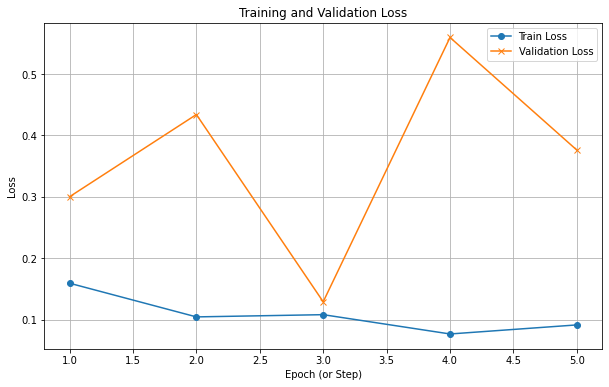

Bad pipe message: %s [b'nnection: keep-alive\r\nUpgrade-Insecure-Requests: 1\r\nUser-Agent: Mo', b'lla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Code/1.97.2 Chrome/128.0.6613.186 Electron/3', b'2.7 Safari/537.36\r\nAccept: text/html,application/']
Bad pipe message: %s [b'tml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7\r\nSec-Fe']


In [ ]:
plot_loss('/home/logs')